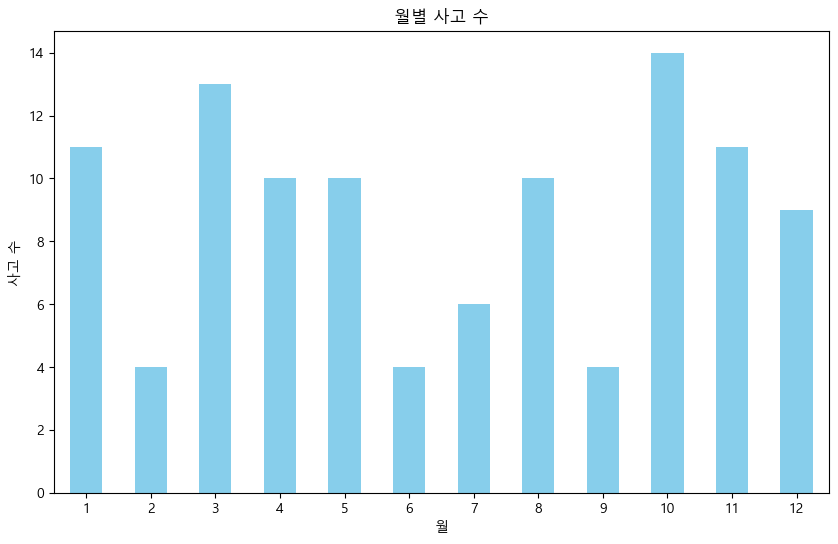

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = '경기도_성남시.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '월' 컬럼 추가
df['월'] = df['사고일시'].dt.month

# 월별 사고 수 계산
monthly_accidents = df.groupby('월').size()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
monthly_accidents.plot(kind='bar', color='skyblue')
plt.title('월별 사고 수')
plt.xlabel('월')
plt.ylabel('사고 수')
plt.xticks(rotation=0)
plt.show()

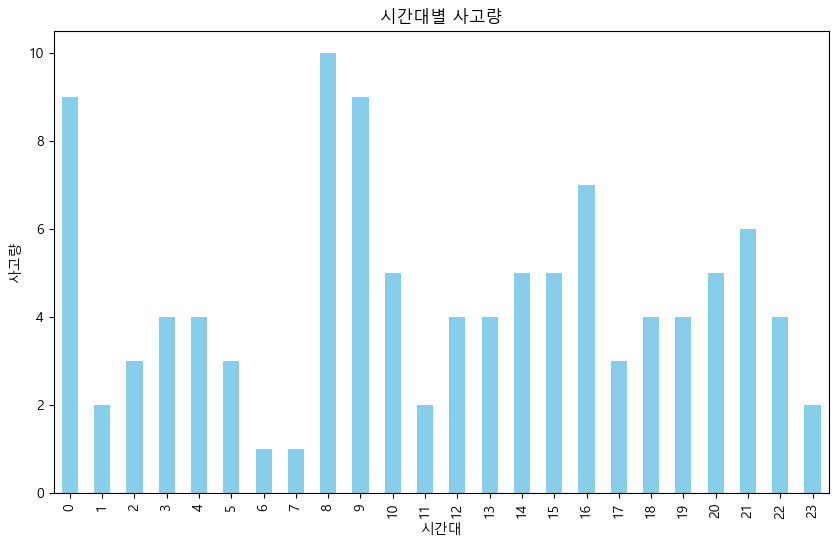

In [3]:
# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시간대' 컬럼 추가
df['시간대'] = df['사고일시'].dt.hour

# 시간대별 사고량 계산
시간대별_사고수 = df['시간대'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
시간대별_사고수.plot(kind='bar', color='skyblue')
plt.title('시간대별 사고량')
plt.xlabel('시간대')
plt.ylabel('사고량')
plt.show()

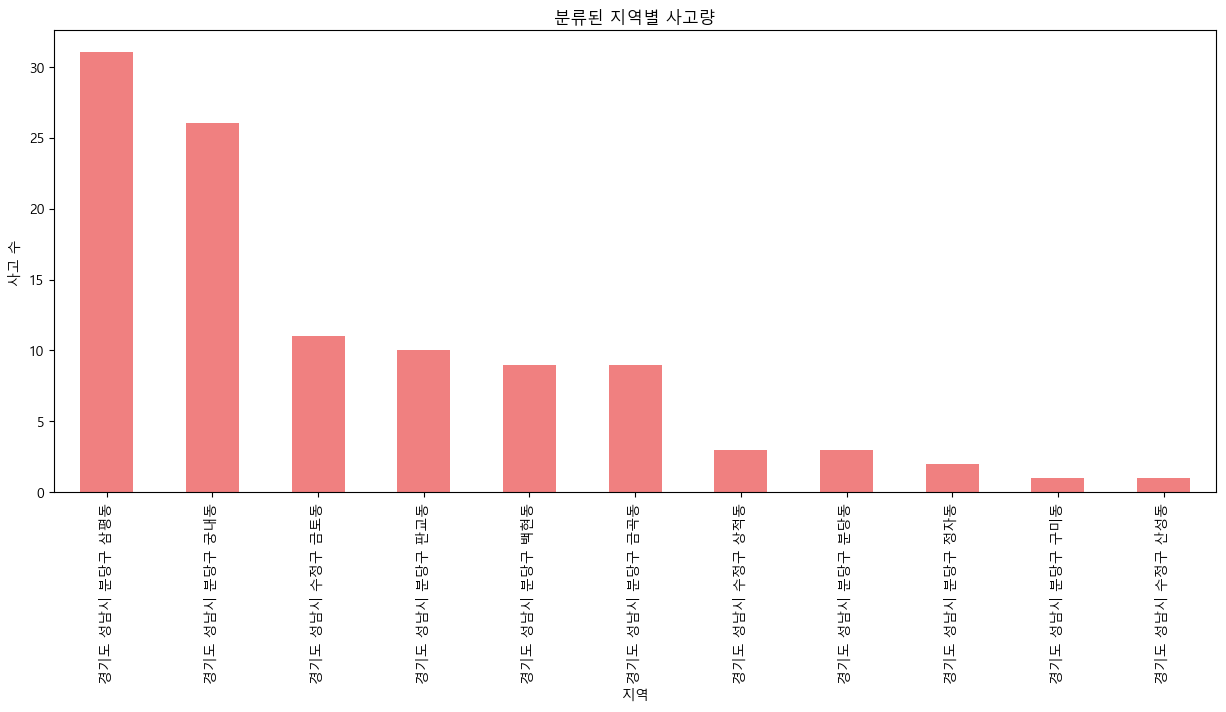

In [4]:
# '시군구' 컬럼을 띄어쓰기를 기준으로 분할하고 필요한 부분 선택
df['분류된지역'] = df['시군구'].apply(lambda x: ' '.join(x.split()[:4]))

# 지역별 사고 수 계산
accident_counts = df['분류된지역'].value_counts()

# 지역별 사고 수 막대그래프 그리기
plt.figure(figsize=(15, 6))
accident_counts.plot(kind='bar', color='lightcoral')
plt.title('분류된 지역별 사고량')
plt.xlabel('지역')
plt.ylabel('사고 수')
plt.show()